# High-Way

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

def convstr(fr):
    if(fr<10):
        return '000'+str(fr)
    if(fr<100):
        return '00'+str(fr) 
    if(fr<1000):
        return '0'+str(fr)
    return str(fr)

kernel2 = np.ones((2,2), np.uint8)
kernel3 = np.ones((3,3), np.uint8)
def fun(thresh,im_gr,i1,i2,i3,i4):
    im_bw = cv2.threshold(im_gr, thresh, 255, cv2.THRESH_BINARY)[1]
    im_bw_blur = cv2.blur(im_bw,(2,2))
    img_dilation = cv2.dilate(im_bw_blur, kernel2, iterations=i1) 
    img_erosion = cv2.erode(img_dilation, kernel2, iterations=i2) 
    img_dil = cv2.dilate(img_erosion, kernel3, iterations=i3) 
    img_er = cv2.erode(img_dil, kernel3, iterations=i4) 
    im_er_bin = cv2.threshold(img_er, thresh, 255, cv2.THRESH_BINARY)[1]
    return im_er_bin

In [2]:
fr= 1
strfr = convstr(fr)
# path = r'C:\Users\Student\DIP\highway\input\in00'+ strfr+'.jpg'
path = r'C:\Users\GiridharaSPK\Desktop\highway\input\in00'+ strfr+'.jpg'
img = io.imread(path)
img = img.astype(int)
total=np.zeros(img.shape,np.float)

In [3]:
while(fr<=1700):
    strfr = convstr(fr)
#     img = io.imread(r'C:\Users\Student\DIP\highway\input\in00'+ strfr+'.jpg')
    img = io.imread(r'C:\Users\GiridharaSPK\Desktop\highway\input\in00'+ strfr+'.jpg')
    total = total+img
    avgt = total/(fr)
    avgt = np.array(np.round(avgt),dtype=np.int)
    x = abs(avgt-img)
    x = x.astype(np.uint8)
    x = cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
    cv2.imwrite('highway\in\in'+str(fr)+'.png',fun(60,x,1,2,3,2))
    fr=fr+1
# cv2.imshow(avgt,cmap='gray')

C:\Users\GiridharaSPK\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


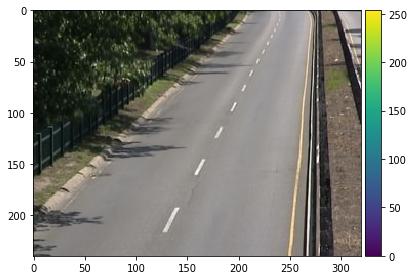

In [4]:
io.imshow(avgt)

In [5]:
l=[]
cnt=800
while cnt<=1700:
#     path='cde\in'+str(cnt)+'.jpg'
    path = 'highway\in\in'+str(cnt)+'.png'
    img2 = io.imread(path)
#     path = r'C:\Users\Student\DIP\highway\groundtruth\gt00'+convstr(cnt)+'.png'
    path = r'C:\Users\GiridharaSPK\Desktop\highway\groundtruth\gt00'+ convstr(cnt)+'.png'
    tmg2 = io.imread(path)
    tn, fp, fn, tp = confusion_matrix(tmg2.flatten(),img2.flatten(),labels=[0,255]).ravel()
    l.append([tn, fp, fn, tp])
    cnt=cnt+1

In [6]:
l

[[62051, 1035, 1560, 8156],
 [62221, 911, 1740, 7851],
 [62394, 929, 1727, 7728],
 [62596, 859, 1349, 7892],
 [62835, 916, 1542, 7575],
 [62998, 837, 1907, 7029],
 [63242, 847, 1875, 6880],
 [63558, 828, 2008, 6401],
 [63794, 941, 2115, 5963],
 [64096, 875, 1638, 6206],
 [64419, 809, 1365, 6218],
 [64632, 810, 1063, 6247],
 [64827, 834, 970, 6164],
 [64818, 813, 1031, 6046],
 [64934, 742, 973, 6129],
 [64623, 809, 1110, 6266],
 [64428, 784, 1256, 6271],
 [64084, 815, 1415, 6220],
 [63725, 790, 1788, 6194],
 [63498, 792, 2007, 6020],
 [63242, 754, 2007, 6275],
 [63000, 767, 2145, 6341],
 [62564, 787, 2296, 6363],
 [62231, 750, 2139, 6794],
 [61940, 753, 2361, 6793],
 [61603, 746, 2174, 7081],
 [61171, 760, 2193, 7462],
 [60822, 839, 2074, 7663],
 [60488, 867, 2156, 7935],
 [60429, 889, 2582, 7917],
 [60349, 918, 2812, 8086],
 [60317, 889, 2936, 8073],
 [60263, 994, 3063, 7797],
 [60379, 1008, 3023, 7696],
 [60292, 1036, 2931, 7817],
 [60367, 1038, 2894, 7716],
 [60385, 1109, 2705, 7789]

In [7]:
fp=0 
fn=0 
tp=0
p=0
r=0
for i in range(len(l)):
    tp=tp+l[i][3]
    fp=fp+l[i][1]
    fn=fn+l[i][2]
    p=p+l[i][3]/(l[i][3]+l[i][1])
    r=r+l[i][3]/(l[i][3]+l[i][2])
p=p/i
r=r/i
print('Prescion: ',tp/(tp+fp))
print('Recall: ',tp/(tp+fn))
print('F-Score: ',2*(tp)/(2*tp+fp+fn))
print('Macro Prescion: ',p)
print('Macro Recall: ',r)
print('Macro F-Score: ',(2*p*r)/(p+r))

Prescion:  0.8413182711683954
Recall:  0.7917806697914942
F-Score:  0.8157981461453842
Macro Prescion:  0.8107285176446476
Macro Recall:  0.8046880013948134
Macro F-Score:  0.8076969658886037


#### Micro

In [8]:
precision_recall_fscore_support(tmg2.flatten(), img2.flatten(), average='micro')

(0.9379557291666667, 0.9379557291666667, 0.9379557291666667, None)

In [9]:
cnt = 900
path = 'highway\in\in'+str(cnt)+'.png'
img2 = io.imread(path)
path = r'C:\Users\GiridharaSPK\Desktop\highway\groundtruth\gt00'+ convstr(cnt)+'.png'
tmg2 = io.imread(path)
precision_recall_fscore_support(tmg2.flatten(), img2.flatten(), average='micro')

(0.9163151041666666, 0.9163151041666666, 0.9163151041666666, None)

In [10]:
#P=tp/(tp+fp)

In [11]:
#R=tp/(tp+fn)

In [12]:
#2*(tp)/(2*tp+fp+fn)

In [14]:
l=[]
cnt=800
while cnt<=1700:
#     path='cde\in'+str(cnt)+'.jpg'
    path = 'highway\in\in'+str(cnt)+'.png'
    img2 = io.imread(path)
#     path = r'C:\Users\Student\DIP\highway\groundtruth\gt00'+convstr(cnt)+'.png'
    path = r'C:\Users\GiridharaSPK\Desktop\highway\groundtruth\gt00'+ convstr(cnt)+'.png'
    tmg2 = io.imread(path)
    tn, fp, fn, tp = confusion_matrix(tmg2.flatten(),img2.flatten(),labels=[255,0]).ravel()
    l.append([tn, fp, fn, tp])
    cnt=cnt+1

In [15]:
fp=0 
fn=0 
tp=0
p=0
r=0
for i in range(len(l)):
    tp=tp+l[i][3]
    fp=fp+l[i][1]
    fn=fn+l[i][2]
    p=p+l[i][3]/(l[i][3]+l[i][1])
    r=r+l[i][3]/(l[i][3]+l[i][2])
p=p/i
r=r/i
print('Prescion: ',tp/(tp+fp))
print('Recall: ',tp/(tp+fn))
print('F-Score: ',2*(tp)/(2*tp+fp+fn))
print('Macro Prescion: ',p)
print('Macro Recall: ',r)
print('Macro F-Score: ',(2*p*r)/(p+r))

Prescion:  0.984058262077158
Recall:  0.9885145406873413
F-Score:  0.9862813677482505
Macro Prescion:  0.984790032694414
Macro Recall:  0.9895457921815597
Macro F-Score:  0.9871621846261287
